# Plotting average win)rate over time

# Disclaimer

This will not work because you are missing data...

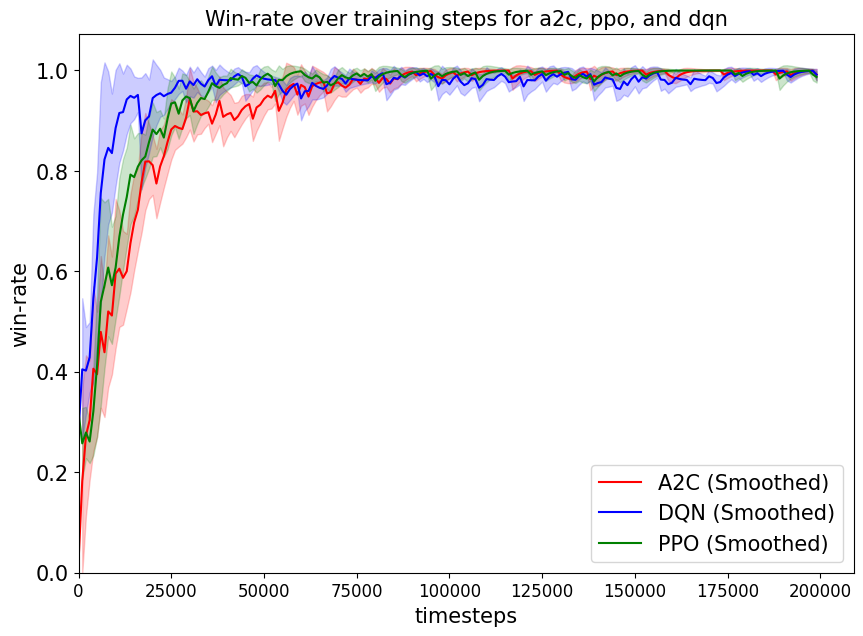

In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

with open('json_reader.json', 'r') as f:
    data = json.load(f)

plt.figure(figsize=(10, 7))

colors = ['red', 'blue', 'green']

for index, key in enumerate(list(data.keys())):
    # x_labels = list(data[key].keys())
    # x_ticks = np.arange(rew(x_labels))

    # white_values = pd.Series([values[0] / 25 for values in data[key].values()])
    # black_values = pd.Series([values[1] / 25 for values in data[key].values()])
    values = pd.Series([(values[1] + values[0]) / 50 for values in data[key].values()])
    
    end_index = int(values.size * 0.2)
    values = values[:end_index]
    
    l = list(data[key].keys())
    g = []
    for v in l:
        g.append(int(v) - 1000)
    
    x_labels = np.array(g)
    x_labels = x_labels[:end_index]
    x_ticks = np.array([tick for tick in x_labels])

    smoothing_alpha = 0.6

    # white_smooth = white_values.ewm(alpha=1-smoothing_alpha).mean()
    # black_smooth = black_values.ewm(alpha=1-smoothing_alpha).mean()

    # white_std = white_values.ewm(alpha=1-smoothing_alpha).std()
    # black_std = black_values.ewm(alpha=1-smoothing_alpha).std()
    
    values_smooth = values.ewm(alpha=1-smoothing_alpha).mean()
    values_std = values.ewm(alpha=1-smoothing_alpha).std()

    # plt.plot(x_ticks, white_smooth, color='green', label=f'{key} (Smoothed)')
    # plt.fill_between(x_ticks, white_smooth - white_std, white_smooth + white_std, color='green', alpha=0.2)

    # plt.plot(x_ticks, black_smooth, color='blue', label=f'{key}Black (Smoothed)')
    # plt.fill_between(x_ticks, black_smooth - black_std, black_smooth + black_std, color='blue', alpha=0.2)
    
    plt.plot(x_ticks, values_smooth, color=colors[index], label=f'{key} (Smoothed)')
    plt.fill_between(x_ticks, values_smooth - values_std, values_smooth + values_std, color=colors[index], alpha=0.2)

# tick_frequency = 20 # Change this as needed for more data points
# plt.xticks(ticks=x_ticks[::tick_frequency], labels=x_labels[::tick_frequency], fontsize=12)

plt.title('Win-rate over training steps for a2c, ppo, and dqn', fontsize=15)
plt.xlabel('timesteps', fontsize=15)
plt.ylabel('win-rate', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.legend(fontsize=15)
plt.savefig("time_winrate.png")
plt.show()

# Plotting win-rate heatmap

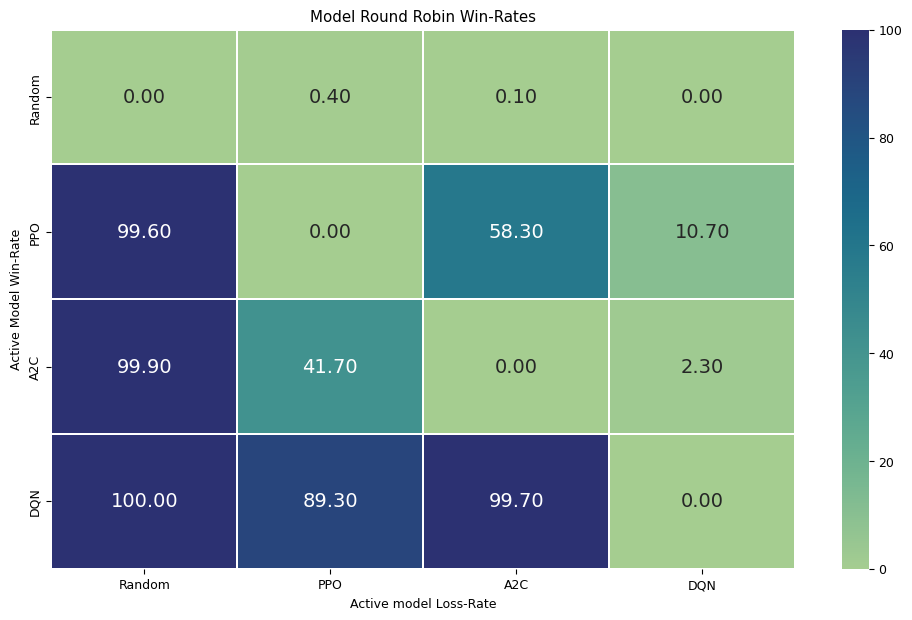

In [29]:
import seaborn as sns
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# data = pd.DataFrame(
#     [[0, 32, 90, 5],
#     [19968, 0, 14151, 6860],
#     [19910, 5849, 0, 5521],
#     [19995, 13140, 14479, 0]], 
#     dtype=float,
#     columns=[["Random", "PPO", "A2C", "DQN"]], 
#     index=["Random", "PPO", "A2C", "DQN"]
# )

# data = data / 20000.0 * 100

# data = pd.DataFrame(
#     [[0, 204, 475, 13],
#     [99796, 0, 70826, 34298],
#     [99525, 29174, 0, 27557],
#     [99987, 65702, 72443, 0]], 
#     dtype=float,
#     columns=[["Random", "PPO", "A2C", "DQN"]], 
#     index=["Random", "PPO", "A2C", "DQN"]
# )

# data = data / 100000.0 * 100

# data = pd.DataFrame(
#     [[0, 0, 0, 0],
#     [200, 0, 97, 77],
#     [200, 103, 0, 6],
#     [200, 123, 194, 0]], 
#     dtype=float,
#     columns=[["Random", "PPO", "A2C", "DQN"]], 
#     index=["Random", "PPO", "A2C", "DQN"]
# )

# data = data / 200.0 * 100

data = pd.DataFrame(
    [[0, 4, 1, 0],
    [996, 0, 583, 107],
    [999, 417, 0, 23],
    [1000, 893, 997, 0]], 
    dtype=float,
    columns=[["Random", "PPO", "A2C", "DQN"]], 
    index=["Random", "PPO", "A2C", "DQN"]
)

data = data / 1000.0 * 100

fig, ax = plt.subplots(figsize = (12, 7))

ax = sns.heatmap(
    data, cmap='crest', linewidths=0.30, 
    annot=True, vmin=0, vmax=100, center=50,
    fmt=".2f", annot_kws={"size": 14}
)
ax.set(xlabel="Active model Loss-Rate", ylabel="Active Model Win-Rate", title="Model Round Robin Win-Rates")
plt.savefig("heatmap.png")

# Learning graph

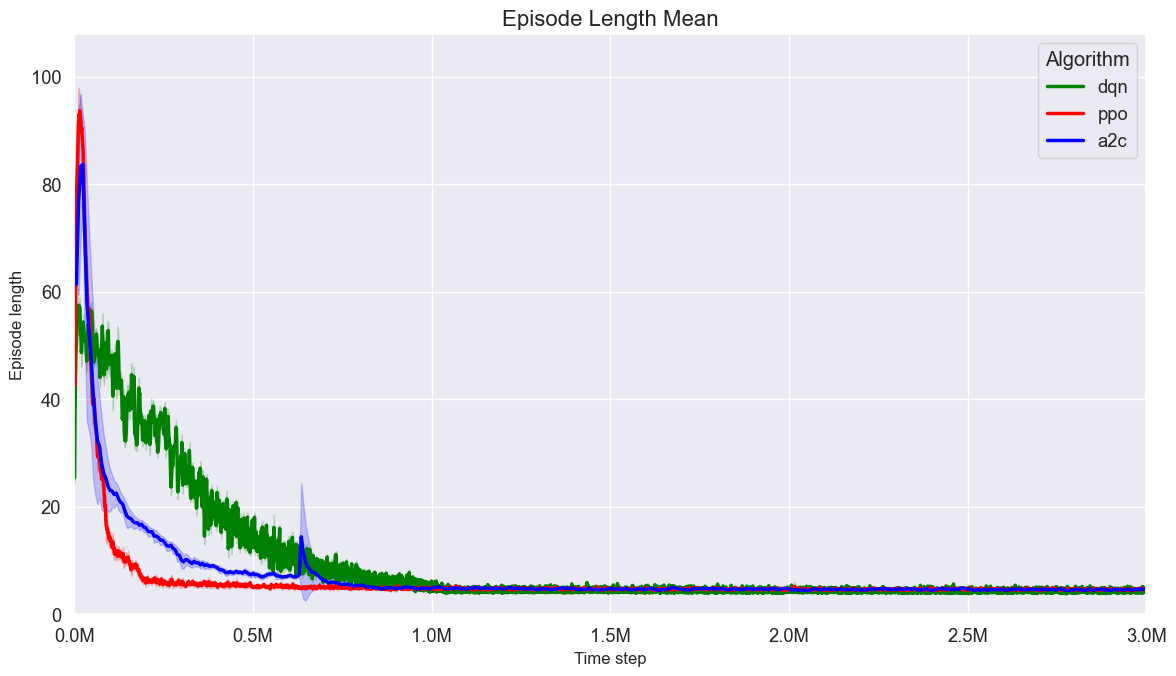

In [ ]:
import seaborn as sns
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

a2c_path = "models/a2c_md/logs/3x3x3/a2c_md_end_game_1/logs.csv"
ppo_path = "models/ppo_md/logs/3x3x3/ppo_md_end_game_1/logs.csv"
dqn_path = "dqn.csv"

df_ppo = pd.read_csv(ppo_path)
df_a2c = pd.read_csv(a2c_path)
df_dqn = pd.read_csv(dqn_path)

df_ppo['Algorithm'] = 'ppo'
df_a2c['Algorithm'] = 'a2c'
df_dqn['Algorithm'] = 'dqn'

combined_df = pd.concat([df_dqn, df_ppo, df_a2c], ignore_index=True)

smoothing_alpha = 0.6
ewm_alpha = 1 - smoothing_alpha 

grouped = combined_df.groupby('Algorithm')['rollout/ep_rew_mean']

combined_df['ep_rew_smooth_mean'] = grouped.transform(
    lambda x: x.ewm(alpha=ewm_alpha).mean()
)

combined_df['ep_rew_smooth_std'] = grouped.transform(
    lambda x: x.ewm(alpha=ewm_alpha).std()
)
# ---------------------------

combined_df['ep_rew_smooth_std'] = combined_df['ep_rew_smooth_std'].fillna(0)

max_y_val = (
    combined_df['ep_rew_smooth_mean'] + combined_df['ep_rew_smooth_std']
).max()

colors = {'ppo': 'red', 'a2c': 'blue', 'dqn': 'green'}
plt.figure(figsize=(12, 7))

plot = sns.lineplot(
    data=combined_df,
    x='step',
    y='ep_rew_smooth_mean',
    hue='Algorithm',
    palette=colors,
    linewidth=2.5,
    legend=True
)

algorithms = combined_df['Algorithm'].unique()

for algo in algorithms:
    algo_df = combined_df[combined_df['Algorithm'] == algo].sort_values('step')
    
    color = colors[algo]
    
    mean = algo_df['ep_rew_smooth_mean']
    std = algo_df['ep_rew_smooth_std']
    
    # Plot the shaded region
    plt.fill_between(
        algo_df['step'],
        mean - std,
        mean + std,
        color=color,
        alpha=0.2
    )

sns.set_theme(style="darkgrid", font_scale=1.2, palette="pastel")

plt.title("Episode Length Mean", fontsize=16)
plt.xlabel("Time step", fontsize=12)
plt.ylabel("Episode length", fontsize=12)

plt.xlim(0, 3_000_000)
x_ticks = range(0, 3_000_001, 500_000)
x_labels = [f'{x/1_000_000:.1f}M' for x in x_ticks]
plt.xticks(ticks=x_ticks, labels=x_labels)

plt.ylim(0, max_y_val + 10)

plot.get_legend().set_title("Algorithm")

plt.tight_layout()

plt.savefig("plt.png")

In [ ]:
import pandas as pd
from tensorboard.backend.event_processing import event_accumulator

EVENT_FILE_PATH = 'models/dqn/logs/3x3x3/dqn_final_maxed_1/events.out.tfevents.1760582033.mscluster49.ms.wits.ac.za.2951181.0'
TAG_TO_EXTRACT = 'rollout/ep_rew_mean'
OUTPUT_CSV_FILE = 'dqn_ep.csv'

# EVENT_FILE_PATH = 'models/dqn/logs/3x3x3/dqn_final_maxed_1/events.out.tfevents.1760582033.mscluster49.ms.wits.ac.za.2951181.0'
# TAG_TO_EXTRACT = 'rollout/ep_len_mean' 
# OUTPUT_CSV_FILE = 'dqn.csv'

print(f"Attempting to load event file: {EVENT_FILE_PATH}")

try:
    acc = event_accumulator.EventAccumulator(
        EVENT_FILE_PATH,
        size_guidance={event_accumulator.SCALARS: 0}
    )

    acc.Reload()

    print("Available scalar tags in file:")
    print(acc.Tags()['scalars'])

    if TAG_TO_EXTRACT in acc.Tags()['scalars']:
        scalar_events = acc.Scalars(TAG_TO_EXTRACT)
        
        data = []
        for event in scalar_events:
            data.append({
                'step': event.step,
                'rollout/ep_rew_mean': event.value
            })
        
        df_dqn = pd.DataFrame(data)
        
        df_dqn.to_csv(OUTPUT_CSV_FILE, index=False)
        
        print(f"\nSuccess! Extracted {len(df_dqn)} data points for tag '{TAG_TO_EXTRACT}'.")
        print(f"Data saved to '{OUTPUT_CSV_FILE}'.")
        print(df_dqn.head())

    else:
        print(f"\nError: Tag '{TAG_TO_EXTRACT}' not found in the event file.")
        print("Please check the 'Available scalar tags' list above and update the 'TAG_TO_EXTRACT' variable in the script.")

except Exception as e:
    print(f"\nAn error occurred: {e}")
    print("Please ensure the file path is correct and the file is not corrupted.")

Attempting to load event file: models/dqn/logs/3x3x3/dqn_final_maxed_1/events.out.tfevents.1760582033.mscluster49.ms.wits.ac.za.2951181.0
Available scalar tags in file:
['rollout/ep_len_mean', 'rollout/ep_rew_mean', 'rollout/exploration_rate', 'time/fps', 'train/learning_rate', 'train/loss']

✅ Success! Extracted 53930 data points for tag 'rollout/ep_rew_mean'.
Data saved to 'dqn_ep.csv'.
   step  rollout/ep_rew_mean
0   672           -21.545813
1  1280           -33.016651
2  1808           -41.864506
3  2464           -44.463905
4  3024           -49.234089


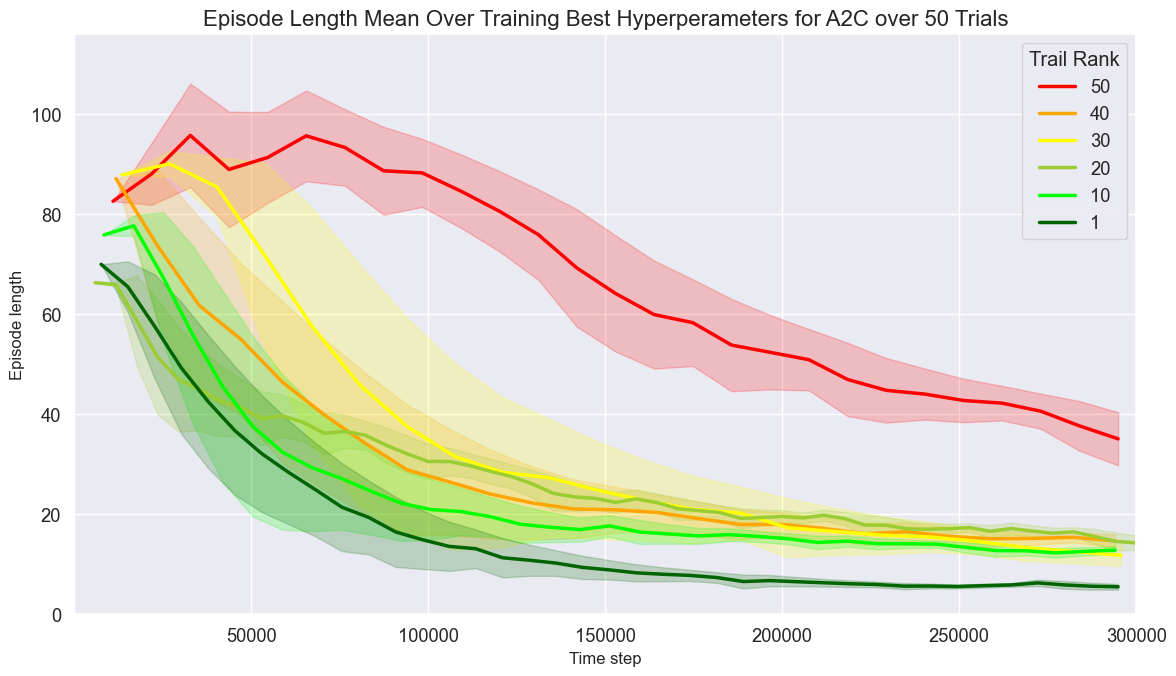

In [ ]:
import seaborn as sns
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

trial_ranks = [50, 40, 30, 20, 10, 1]
# trial_ranks = [1, 10, 20, 30, 40, 50]
# Trial numbers
# a2c_md = np.array([22, 15, 31, 0, 48, 43]) + 1
a2c_md = np.array([15, 31, 22, 0, 48, 43]) + 1
# dqn = np.array([42, 44, 10, 3, 4 , 34]) + 1
dqn = np.array([42, 44, 10, 34, 4 , 3]) + 1
# ppo_md = np.array([42, 6 , 24 , 15, 10, 4]) + 1
ppo_md = np.array([42, 6 , 24 , 15, 4, 10]) + 1

selected_algorithm = "a2c_md"

data_frames = []
paths = []
for index, trial_number in enumerate(a2c_md):
    path = os.path.join("models", selected_algorithm, "logs", "3x3x3", f"{selected_algorithm}_optuna_trial_{trial_number}", "logs.csv")
    paths.append(path)
    df = pd.read_csv(path)
    df['trial number'] = f'{trial_ranks[index]}'
    data_frames.append(df)
    if df.empty:
        print("empty", path)
        exit(1)

combined_df = pd.concat([data_frames[0], data_frames[1], data_frames[2], data_frames[3], data_frames[4], data_frames[5]], ignore_index=True)

smoothing_alpha = 0.6
ewm_alpha = 1 - smoothing_alpha 

grouped = combined_df.groupby('trial number')['rollout/ep_len_mean']

combined_df['ep_len_smooth_mean'] = grouped.transform(
    lambda x: x.ewm(alpha=ewm_alpha).mean()
)

combined_df['ep_len_smooth_std'] = grouped.transform(
    lambda x: x.ewm(alpha=ewm_alpha).std()
)
# ---------------------------

combined_df['ep_len_smooth_std'] = combined_df['ep_len_smooth_std'].fillna(0)

max_y_val = (
    combined_df['ep_len_smooth_mean'] + combined_df['ep_len_smooth_std']
).max()

colors = {
    f'50': 'Red',
    f'40': 'Orange',
    f'30': 'Yellow',
    f'20': 'YellowGreen',
    f'10': 'Lime',
    f'1': 'DarkGreen',
}
# colors = {'ppo': 'red', 'a2c': 'blue', 'dqn': 'green'}
plt.figure(figsize=(12, 7))

plot = sns.lineplot(
    data=combined_df,
    x='step',
    y='ep_len_smooth_mean',
    hue='trial number',
    palette=colors,
    linewidth=2.5,
    legend=True
)

algorithms = combined_df['trial number'].unique()

for algo in algorithms:
    algo_df = combined_df[combined_df['trial number'] == algo].sort_values('step')
    
    color = colors[algo]
    
    mean = algo_df['ep_len_smooth_mean']
    std = algo_df['ep_len_smooth_std']
    
    plt.fill_between(
        algo_df['step'],
        mean - std,
        mean + std,
        color=color,
        alpha=0.2
    )

sns.set_theme(style="darkgrid", font_scale=1.2, palette="pastel")

plt.title("Episode Length Mean Over Training Best Hyperperameters for A2C over 50 Trials", fontsize=16)
plt.xlabel("Time step", fontsize=12)
plt.ylabel("Episode length", fontsize=12)

plt.xlim(0, 300_000)
x_ticks = range(0, 300_001, 50_000)
x_labels = [f'{x}' for x in x_ticks]
if x_labels:
    x_labels[0] = ''
plt.xticks(ticks=x_ticks, labels=x_labels)

plt.ylim(0, max_y_val + 10)

plot.get_legend().set_title("Trail Rank")

plt.tight_layout()

plt.savefig('a2c_opt.png', dpi=300)

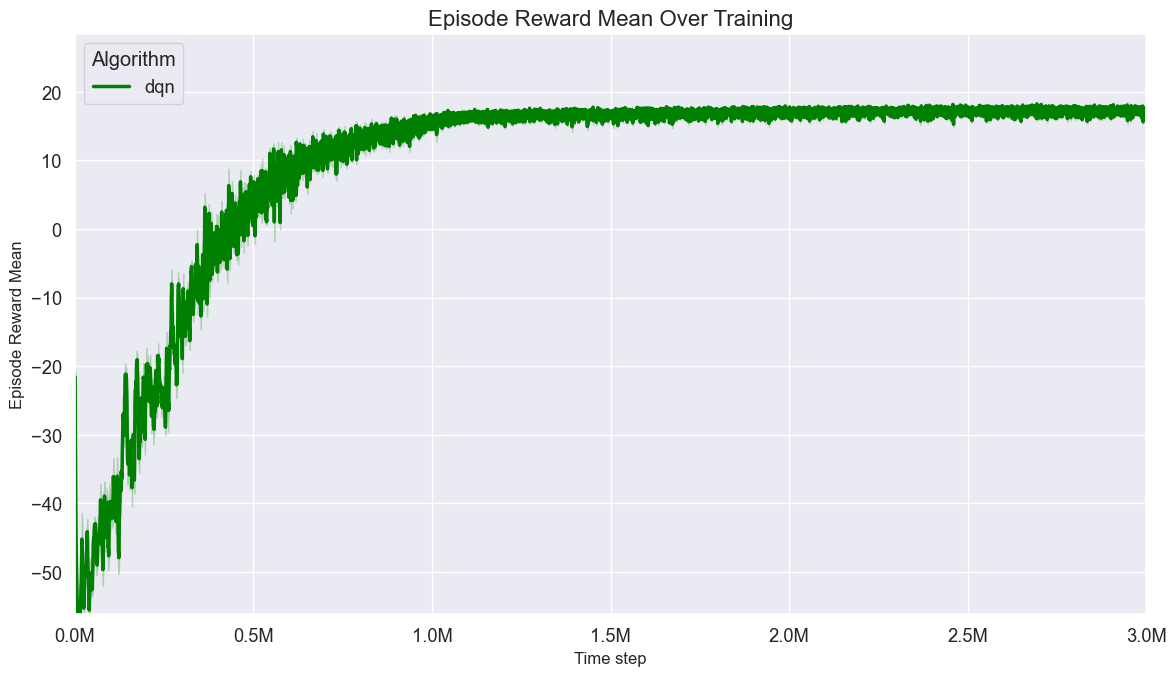

In [ ]:
import seaborn as sns
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

a2c_path = "models/a2c_md/logs/3x3x3/a2c_md_end_game_1/logs.csv"
ppo_path = "models/ppo_md/logs/3x3x3/ppo_md_end_game_1/logs.csv"
dqn_path = "dqn_ep.csv"

df_ppo = pd.read_csv(ppo_path)
df_a2c = pd.read_csv(a2c_path)
df_dqn = pd.read_csv(dqn_path)

df_ppo['Algorithm'] = 'ppo'
df_a2c['Algorithm'] = 'a2c'
df_dqn['Algorithm'] = 'dqn'

combined_df = pd.concat([df_ppo], ignore_index=True)

smoothing_alpha = 0.6
ewm_alpha = 1 - smoothing_alpha 

grouped = combined_df.groupby('Algorithm')['rollout/ep_rew_mean']

combined_df['ep_rew_smooth_mean'] = grouped.transform(
    lambda x: x.ewm(alpha=ewm_alpha).mean()
)

combined_df['ep_rew_smooth_std'] = grouped.transform(
    lambda x: x.ewm(alpha=ewm_alpha).std()
)
# ---------------------------

combined_df['ep_rew_smooth_std'] = combined_df['ep_rew_smooth_std'].fillna(0)

max_y_val = (
    combined_df['ep_rew_smooth_mean'] + combined_df['ep_rew_smooth_std']
).max()

min_y_val = (
    combined_df['ep_rew_smooth_mean'] + combined_df['ep_rew_smooth_std']
).min()

colors = {'ppo': 'red', 'a2c': 'blue', 'dqn': 'green'}
plt.figure(figsize=(12, 7))

plot = sns.lineplot(
    data=combined_df,
    x='step',
    y='ep_rew_smooth_mean',
    hue='Algorithm',
    palette=colors,
    linewidth=2.5,
    legend=True
)

algorithms = combined_df['Algorithm'].unique()

for algo in algorithms:
    algo_df = combined_df[combined_df['Algorithm'] == algo].sort_values('step')
    
    color = colors[algo]
    
    mean = algo_df['ep_rew_smooth_mean']
    std = algo_df['ep_rew_smooth_std']
    
    plt.fill_between(
        algo_df['step'],
        mean - std,
        mean + std,
        color=color,
        alpha=0.2
    )

sns.set_theme(style="darkgrid", font_scale=1.2, palette="pastel")

plt.title("Episode Reward Mean Over Training", fontsize=16)
plt.xlabel("Time step", fontsize=12)
plt.ylabel("Episode Reward Mean", fontsize=12)

plt.xlim(0, 3_000_000)
x_ticks = range(0, 3_000_001, 500_000)
x_labels = [f'{x/1_000_000:.1f}M' for x in x_ticks]
plt.xticks(ticks=x_ticks, labels=x_labels)

plt.ylim(min_y_val, max_y_val + 10)

plot.get_legend().set_title("Algorithm")

plt.tight_layout()

plt.savefig("ppo_rew.png")